##### One-Sample t-tests in Scipy

One-sample t-tests are used for comparing a sample average to a hypothetical population average. For example, a one-sample t-test might be used to address questions such as:

- Is the average amount of time that visitors spend on a website different from 5 minutes?
- Is the average amount of money that customers spend on a purchase more than 10 USD?

As an example, let’s imagine the fictional business BuyPie, which sends ingredients for pies to your household so that you can make them from scratch. Suppose that a product manager wants online BuyPie orders to cost around 1000 Rupees on average. In the past day, 50 people made an online purchase and the average payment per order was less than 1000 Rupees. Are people really spending less than 1000 Rupees on average? Or is this the result of chance and a small sample size?

In [1]:
from scipy.stats import ttest_1samp
import numpy as np
import matplotlib.pyplot as plt



prices = np.genfromtxt('../Datasets/prices.csv')

# print prices:
print(prices)

# calculate prices_mean and print it out:
prices_mean = np.mean(prices)
print('Mean:', prices_mean)

[ 978. 1080.  999.  855. 1105.  961.  899. 1061.  880. 1455.  505.  936.
 1024.  982.  840.  930.  829.  504.  955. 1380. 1361. 1130.  946.  973.
 1076. 1131.  810.  734. 1275.  867.  962.  865.  709. 1216.  735.  768.
  757. 1060.  715.  839.  999. 1259. 1194. 1082. 1129. 1255.  931. 1236.
  921.  907.]
Mean: 980.0


######  Implementing a One-Sample T-Test
In the cell above, we inspected a sample of 50 purchase prices at BuyPie and saw that the average was 980 Rupees. Suppose that we want to run a one-sample t-test with the following null and alternative hypotheses:

- Null: The average cost of a BuyPie order is 1000 Rupees
- Alternative: The average cost of a BuyPie order is not 1000 Rupees.

SciPy has a function called `ttest_1samp()`, which performs a one-sample t-test for you. `ttest_1samp()` requires two inputs, a sample distribution (eg. the list of the 50 observed purchase prices) and a mean to test against (eg. 1000):

`tstat, pval = ttest_1samp(sample_distribution, expected_mean)`

In [2]:
prices_mean = np.mean(prices)
print("mean of prices: " + str(prices_mean))

# use ttest_1samp to calculate pval
tstat, pval = ttest_1samp(prices, 1000)
# print pval
print(pval)

mean of prices: 980.0
0.4920744804182786


P-values are probabilities, so they should be between 0 and 1. This p-value is the probability of observing an average purchase price less than 980 OR more than 1020 among a sample of 50 purchases.

Given that the mean purchase price in this sample was 980, which is not very far from 1000, we probably expect this p-value to be relatively large. The only reason it COULD be small (eg., <.05) is if purchase prices had very little variation (eg., they were all within a few Rupees of 980). We can see from the data print out that this is not the case. Therefore, a p-value around 0.49 makes sense!

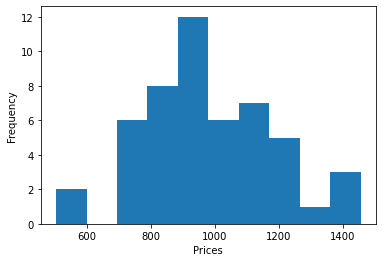

In [4]:
#plot your histogram here
plt.hist(prices)
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()